<a href="https://colab.research.google.com/github/flavio641/Modelos_Aprendizados_Maquinas/blob/main/ModeloCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [33]:
df = pd.read_csv('/content/base_cluster.csv')
df

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Year_Birth,Income
0,5524,635,88,546,172,88,88,1957,58138.0
1,2174,11,1,6,2,1,6,1954,46344.0
2,4141,426,49,127,111,21,42,1965,71613.0
3,6182,11,4,20,10,3,5,1984,26646.0
4,5324,173,43,118,46,27,15,1981,58293.0
...,...,...,...,...,...,...,...,...,...
2235,10870,709,43,182,42,118,247,1967,61223.0
2236,4001,406,0,30,0,0,8,1946,64014.0
2237,7270,908,48,217,32,12,24,1981,56981.0
2238,8235,428,30,214,80,30,61,1956,69245.0


In [34]:
df2 = df.set_index('ID').filter(regex= 'Mnt', axis= 1)
df2

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
ID,,,,,,
5524,635,88,546,172,88,88
2174,11,1,6,2,1,6
4141,426,49,127,111,21,42
6182,11,4,20,10,3,5
5324,173,43,118,46,27,15
...,...,...,...,...,...,...
10870,709,43,182,42,118,247
4001,406,0,30,0,0,8
7270,908,48,217,32,12,24


In [35]:
# Somar por linha 
df2.sum(axis=1)

ID
5524     1617
2174       27
4141      776
6182       53
5324      422
         ... 
10870    1341
4001      444
7270     1241
8235      843
9405      172
Length: 2240, dtype: int64

In [36]:
# Dividir os resultados em porcentagem

df3 = df2.divide(df2.sum(axis= 1), axis= 'index')
df3

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
ID,,,,,,
5524,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422
2174,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222
4141,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124
6182,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340
5324,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545
...,...,...,...,...,...,...
10870,0.528710,0.032066,0.135720,0.031320,0.087994,0.184191
4001,0.914414,0.000000,0.067568,0.000000,0.000000,0.018018
7270,0.731668,0.038678,0.174859,0.025786,0.009670,0.019339


In [37]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 4)
km.fit(df3)

KMeans(n_clusters=4)

In [38]:
clus = km.predict(df3)
clus

array([3, 2, 2, ..., 1, 2, 2], dtype=int32)

In [39]:
np.unique(clus, return_counts= True)

(array([0, 1, 2, 3], dtype=int32), array([378, 606, 727, 529]))

In [40]:
df3.loc[:, 'cluster'] = clus
df3

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,cluster
ID,,,,,,,
5524,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,3
2174,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,2
4141,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,2
6182,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,3
5324,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,2
...,...,...,...,...,...,...,...
10870,0.528710,0.032066,0.135720,0.031320,0.087994,0.184191,2
4001,0.914414,0.000000,0.067568,0.000000,0.000000,0.018018,1
7270,0.731668,0.038678,0.174859,0.025786,0.009670,0.019339,1


In [42]:
 aux = df3.groupby('cluster').mean()
 aux

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
cluster,,,,,,
0,0.142992,0.106475,0.202335,0.155391,0.112987,0.279820
1,0.744348,0.014522,0.141953,0.019448,0.014014,0.065716
2,0.498326,0.041543,0.246986,0.061169,0.043877,0.108100
3,0.301681,0.059813,0.409893,0.085519,0.057923,0.085170


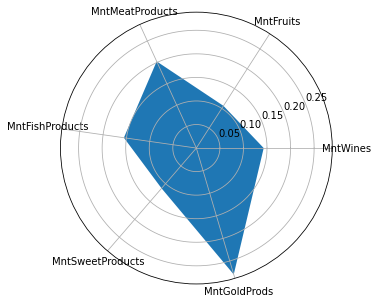

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(1,1,1, projection = 'polar')
plt.fill(aux.loc[0])

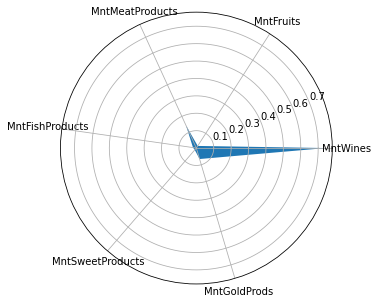

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(1,1,1, projection = 'polar')
plt.fill(aux.loc[1])

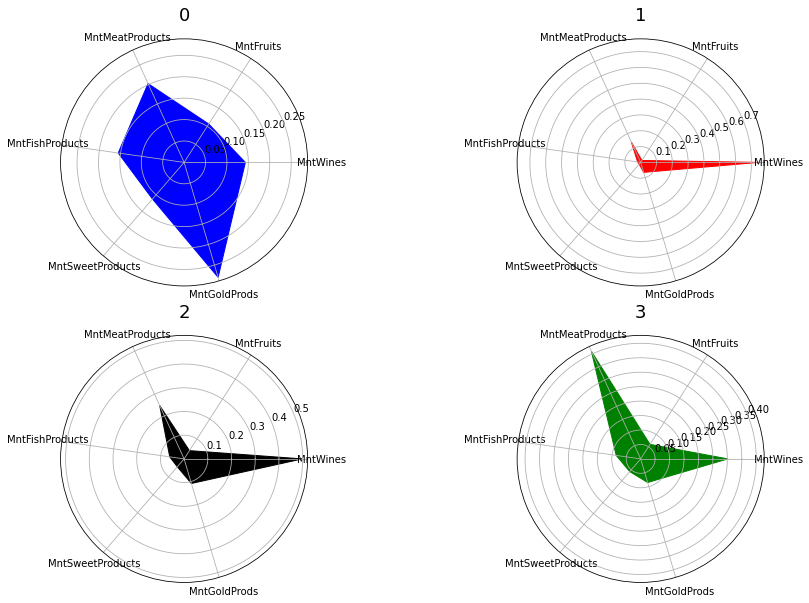

In [49]:
# Plotar todos os gráficos 
plt.figure(figsize= (15,2*5))
color = ['b','r','k','g']
for cl in aux.index:
  plt.subplot(2,2,cl +1 , projection = 'polar')
  plt.fill(aux.loc[cl], color = color[cl])
  plt.title(cl, fontsize = 18)

In [50]:
df

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Year_Birth,Income
0,5524,635,88,546,172,88,88,1957,58138.0
1,2174,11,1,6,2,1,6,1954,46344.0
2,4141,426,49,127,111,21,42,1965,71613.0
3,6182,11,4,20,10,3,5,1984,26646.0
4,5324,173,43,118,46,27,15,1981,58293.0
...,...,...,...,...,...,...,...,...,...
2235,10870,709,43,182,42,118,247,1967,61223.0
2236,4001,406,0,30,0,0,8,1946,64014.0
2237,7270,908,48,217,32,12,24,1981,56981.0
2238,8235,428,30,214,80,30,61,1956,69245.0


In [51]:
df.loc[:, 'cluster'] = clus
df

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Year_Birth,Income,cluster
0,5524,635,88,546,172,88,88,1957,58138.0,3
1,2174,11,1,6,2,1,6,1954,46344.0,2
2,4141,426,49,127,111,21,42,1965,71613.0,2
3,6182,11,4,20,10,3,5,1984,26646.0,3
4,5324,173,43,118,46,27,15,1981,58293.0,2
...,...,...,...,...,...,...,...,...,...,...
2235,10870,709,43,182,42,118,247,1967,61223.0,2
2236,4001,406,0,30,0,0,8,1946,64014.0,1
2237,7270,908,48,217,32,12,24,1981,56981.0,1
2238,8235,428,30,214,80,30,61,1956,69245.0,2


In [52]:
# Agrupando por idade
df.groupby('cluster').Year_Birth.mean()

cluster
0    1973.825397
1    1965.064356
2    1967.763411
3    1970.937618
Name: Year_Birth, dtype: float64

In [53]:
#Agrupando por Renda Anual
df.groupby('cluster').Income.mean()

cluster
0    32449.954907
1    55677.612957
2    55844.881616
3    57671.922929
Name: Income, dtype: float64